# Electronics Sales Prediction
---

# Installs

In [4]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydocstyle 6.2.3 requires importlib-metadata<5.0.0,>=2.0.0; python_version < "3.8", but you have importlib-metadata 6.0.0 which is incompatible.
librosa 0.10.0 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
ibis-framework 2.1.1 requires importlib-metadata<5,>=4; python_version < "3.8", but you have importlib-metadata 6.0.0 which is incompatible.
flake8 5.0.4 requires importlib-metadata<4.3,>=1.1.0; python_version < "3.8", but you have importlib-metadata 6.0.0 which is incompatible.
cmudict 1.0.13 requires importlib-metadata<6.0.0,>=5.1.0, but you have importlib-metadata 6.0.0 which is incompatible.


# Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions

from pycaret  import regression
from sklearn.model_selection import cross_val_score

# Data Loading

In [7]:
df = pd.read_csv('/content/sample_data/Advertising.csv')

In [8]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [13]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

# EDA

In [14]:
df.shape

(200, 4)

In [15]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
TV,190,float64,0,0.000000,95.000000,0,
Newspaper,172,float64,0,0.000000,86.000000,0,
Radio,167,float64,0,0.000000,83.500000,0,
Sales,121,float64,0,0.000000,60.500000,0,


# Correlation

<AxesSubplot:>

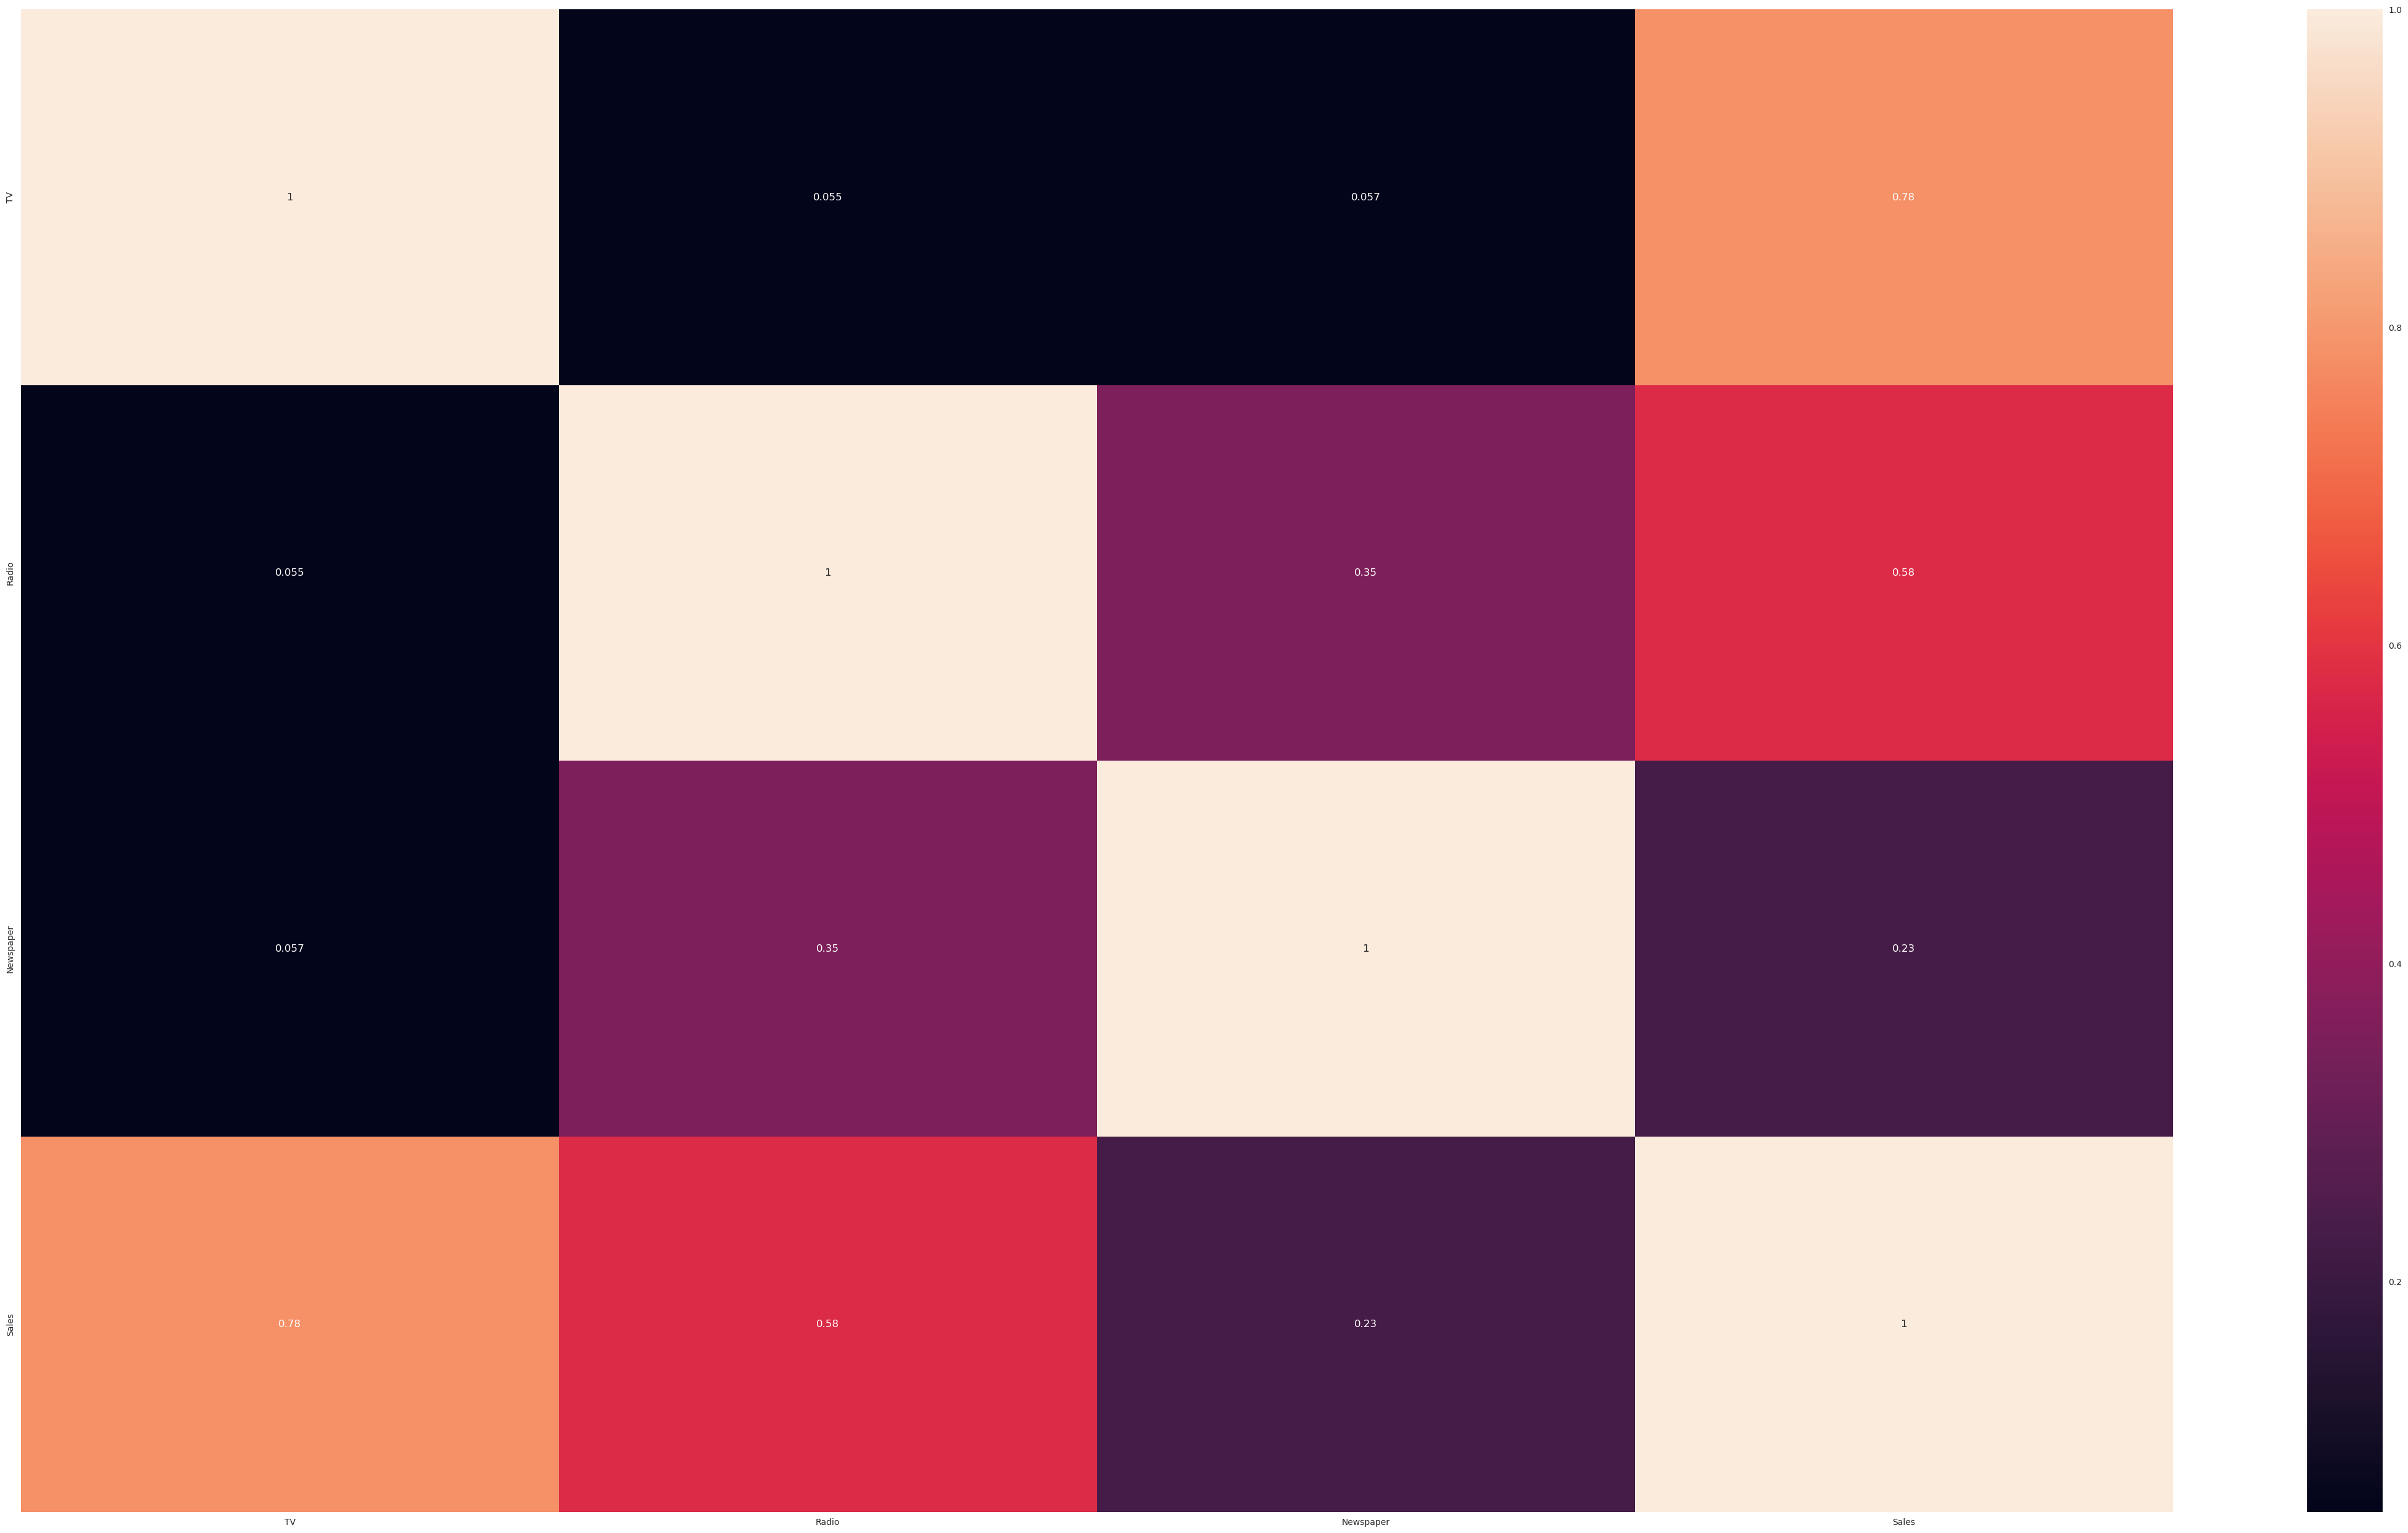

In [16]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)

# Outliers

In [17]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(df)

,Outlier_percentage
Newspaper,1.0
TV,0.0
Radio,0.0
Sales,0.0


# Comparing Regression Models

In [18]:
from pycaret.regression import *

In [20]:
X = df.drop('Sales', axis = 1)
y = df['Sales']

In [21]:
s = setup(data = df, target = 'Sales', session_id=123)

,Description,Value
0,Session id,123
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [22]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4624,0.4099,0.6207,0.9829,0.0638,0.0524,0.1550
rf,Random Forest Regressor,0.6819,0.7522,0.8463,0.9707,0.0810,0.0698,0.1820
gbr,Gradient Boosting Regressor,0.6543,0.7543,0.8449,0.9695,0.0821,0.0685,0.0550
catboost,CatBoost Regressor,0.5632,0.9416,0.8862,0.9636,0.1010,0.0774,0.6820
xgboost,Extreme Gradient Boosting,0.7092,0.8571,0.9083,0.9628,0.0842,0.0708,0.1400
ada,AdaBoost Regressor,0.9118,1.3620,1.1184,0.9487,0.1028,0.0923,0.0550
dt,Decision Tree Regressor,0.9336,1.6092,1.2321,0.9283,0.1167,0.0949,0.0250
lightgbm,Light Gradient Boosting Machine,0.9731,1.8903,1.3323,0.9196,0.1434,0.1178,0.1270
knn,K Neighbors Regressor,1.2407,2.7481,1.6193,0.8813,0.1221,0.1120,0.0490
lasso,Lasso Regression,1.3834,3.3047,1.7500,0.8674,0.1721,0.1612,0.0240


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

# Extra Trees Regressor Model

Extra Trees Regressor is an ensemble machine learning algorithm that is used for regression tasks. It is based on the Random Forest algorithm and works by creating a large number of decision trees, each using a random subset of the available features and data. It then combines the predictions of all these decision trees to make a final prediction. One key difference between Extra Trees and Random Forest is that Extra Trees selects the splitting thresholds of each node randomly, rather than searching for the best threshold. This makes Extra Trees faster to train than Random Forests, while still achieving good predictive performance.

In [23]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3637,0.3478,0.5897,0.9842,0.0373,0.0286
1,0.6276,1.1538,1.0741,0.9629,0.2399,0.2001
2,0.4551,0.4245,0.6515,0.9864,0.0389,0.0328
3,0.4281,0.3163,0.5624,0.9733,0.0404,0.0326
4,0.4111,0.2964,0.5444,0.9760,0.0422,0.0323
5,0.4338,0.2968,0.5448,0.9871,0.0384,0.0359
6,0.4693,0.3032,0.5506,0.9909,0.0468,0.0407
7,0.4261,0.2542,0.5042,0.9869,0.0565,0.0431
8,0.4567,0.3008,0.5485,0.9910,0.0603,0.0414


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
et = finalize_model(et)
et

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['TV', 'Radio', 'Newspaper'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [25]:
preds = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


### R2 Score : 1.0000

# Predictions

In [26]:
preds

,TV,Radio,Newspaper,Sales,prediction_label
140,199.800003,3.100000,34.599998,11.400000,11.400000
141,80.199997,0.000000,9.200000,8.800000,8.800000
142,74.699997,49.400002,45.700001,14.700000,14.700000
143,44.700001,25.799999,20.600000,10.100000,10.100000
144,147.300003,23.900000,19.100000,14.600000,14.600000
145,238.199997,34.299999,5.300000,20.700001,20.700001
146,165.600006,10.000000,17.600000,12.600000,12.600000
147,182.600006,46.200001,58.700001,21.200001,21.200001
148,188.399994,18.100000,25.600000,14.900000,14.900000
149,11.700000,36.900002,45.200001,7.300000,7.300000
